In [11]:
import pandas as pd
import numpy as np
import torch
import os
import glob
import pydicom
import matplotlib.pylab as plt
from PIL import Image, ImageDraw
from torchvision import transforms


In [5]:
%run maskrcnn_benchmark/data/datasets/cxr.py
%run maskrcnn_benchmark/data/collate_batch.py

In [4]:
# data_path = '/share/fsmresfiles/MIMIC_CXR/2.0.0/'
data_path = '/data/Mao/DATASET/MIMIC-CXR/2.0.0/'

In [29]:
from torchvision import transforms
transform = transforms.Compose([ transforms.ToTensor(), transforms.Normalize(mean=[0.406, 0.456, 0.485],std=[0.225, 0.224, 0.229]) ])

In [68]:
dataset = MimicCXR_V2(data_path,  transforms = transform)

In [79]:
from torch.utils.data import Dataset, DataLoader
train_set, validation_set, test_set = dataset.split()
train_loader = DataLoader(train_set, batch_size=4, collate_fn= BatchCollator_cxr(), shuffle=True,  pin_memory=True, num_workers=4)

In [80]:
data = iter(train_loader).next()

[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)
[W pthreadpool-cpp.cc:90] Warning: Leaking Caffe2 thread-pool after fork. (function pthreadpool)


In [84]:
data['prompt_target'].columns.tolist()
torch.Tensor(data['prompt_target'].values)

['disease Atelectasis found',
 'disease Pneumothorax found',
 'Support Devices found',
 'no disease found',
 'disease Edema found',
 'disease Pleural Effusion found',
 'disease Cardiomegaly found',
 'disease Consolidation found']

tensor([[1., 1., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 1., 1.]])

In [92]:
train_loader.dataset.label_prompt

['disease text found',
 'disease Atelectasis found',
 'disease Cardiomegaly found',
 'disease Consolidation found',
 'disease Edema found',
 'disease Enlarged Cardiomediastinum found',
 'disease Fracture found',
 'disease Lung Lesion found',
 'disease Lung Opacity found',
 'no disease found',
 'disease Pleural Effusion found',
 'disease Pleural Other found',
 'disease Pneumonia found',
 'disease Pneumothorax found',
 'Support Devices found']

In [64]:
pd.DataFrame([{s:1 for s in x} for x in data['label_prompt']]).fillna(0)

,no disease found,disease Atelectasis found,disease Lung Opacity found,disease Pleural Effusion found,disease Edema found,not sure if disease Pleural Effusion found,disease Cardiomegaly found,Support Devices found
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [5]:
meta_data = pd.read_csv(os.path.join(data_path, 'cxr-study-list.csv'))

In [7]:
label_data = pd.read_csv(os.path.join(data_path, 'mimic-cxr-2.0.0-chexpert.csv'))

In [10]:
meta_data.merge(label_data,on=['subject_id','study_id'], how='left')

,subject_id,study_id,path,text,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,10000032,50414267,files/p10/p10000032/s50414267.txt,final report\n examination: chest (pa and lat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,10000032,53189527,files/p10/p10000032/s53189527.txt,final report\n examination: chest (pa and lat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,10000032,53911762,files/p10/p10000032/s53911762.txt,final report\n examination: chest (portable a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,10000032,56699142,files/p10/p10000032/s56699142.txt,final report\n indication: ___ year old woman...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,10000764,57375967,files/p10/p10000764/s57375967.txt,final report\n examination: chest (pa and lat...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227830,19999442,58708861,files/p19/p19999442/s58708861.txt,final report\n portable ap chest x-ray\n \n in...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
227831,19999733,57132437,files/p19/p19999733/s57132437.txt,final report\n indication: ___-year-old with ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
227832,19999987,55368167,files/p19/p19999987/s55368167.txt,final report\n portable chest of ___\n \n comp...,1.0,-1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN
227833,19999987,58621812,files/p19/p19999987/s58621812.txt,final report\n chest radiograph performed on _...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [6]:
image_files = glob.glob(os.path.join(data_path, 'files/p10/p10000032/s50414267')+'/*.jpg')

In [7]:
images = [Image.open(fn).convert("RGB") for fn in image_files]

In [20]:
image = transforms.ToTensor()(images[0])*255

In [39]:
image[0]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [34]:
from torchvision.transforms import functional as F
F.normalize(image, mean=[ 103.530, 116.280, 123.675 ], std=[ 57.375, 57.120, 58.395 ]).max()

tensor(2.6400)

In [42]:
transform(images[0])

tensor([[[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         ...,
         [-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2

In [78]:
s=time.time()
ds = pydicom.dcmread('/share/fsmresfiles/MIMIC_CXR/2.0.0/files/p10/p10935586/s57922700/63522ab8-faa45d49-7ac7aeab-1168d5f9-24859a09.dcm')
print(time.time()-s)

0.17815876007080078


In [32]:
ds.pixel_array.shape

(3056, 2544)

In [70]:
import time
s=time.time()
im = Image.open('/share/fsmresfiles/MIMIC_CXR/MIMIC_CXR_JPG_2/physionet.org/files/mimic-cxr-jpg/2.0.0/files/p10/p10935586/s57922700/63522ab8-faa45d49-7ac7aeab-1168d5f9-24859a09.jpg')
print(time.time()-s)

0.004040241241455078


In [44]:
s

<function time.time>

In [45]:
st_jpg =glob.glob('/share/fsmresfiles/MIMIC_CXR/MIMIC_CXR_JPG_2/physionet.org/files/mimic-cxr-jpg/2.0.0/files/*/*/s*')

In [28]:
st_jpg

NameError: name 'st_jpg' is not defined

In [37]:
glob.glob('/share/fsmresfiles/MIMIC_CXR/2.0.0/files/*')

['/share/fsmresfiles/MIMIC_CXR/2.0.0/files/p19',
 '/share/fsmresfiles/MIMIC_CXR/2.0.0/files/p13',
 '/share/fsmresfiles/MIMIC_CXR/2.0.0/files/index.html',
 '/share/fsmresfiles/MIMIC_CXR/2.0.0/files/p12',
 '/share/fsmresfiles/MIMIC_CXR/2.0.0/files/p18',
 '/share/fsmresfiles/MIMIC_CXR/2.0.0/files/p14',
 '/share/fsmresfiles/MIMIC_CXR/2.0.0/files/p17',
 '/share/fsmresfiles/MIMIC_CXR/2.0.0/files/p16',
 '/share/fsmresfiles/MIMIC_CXR/2.0.0/files/p11',
 '/share/fsmresfiles/MIMIC_CXR/2.0.0/files/p10',
 '/share/fsmresfiles/MIMIC_CXR/2.0.0/files/p15']

In [38]:
[x for x in persons if x.endswith('.html')]

['/share/fsmresfiles/MIMIC_CXR/2.0.0/files/p19/index.html',
 '/share/fsmresfiles/MIMIC_CXR/2.0.0/files/p13/index.html',
 '/share/fsmresfiles/MIMIC_CXR/2.0.0/files/p12/index.html',
 '/share/fsmresfiles/MIMIC_CXR/2.0.0/files/p18/index.html',
 '/share/fsmresfiles/MIMIC_CXR/2.0.0/files/p14/index.html',
 '/share/fsmresfiles/MIMIC_CXR/2.0.0/files/p17/index.html',
 '/share/fsmresfiles/MIMIC_CXR/2.0.0/files/p16/index.html',
 '/share/fsmresfiles/MIMIC_CXR/2.0.0/files/p11/index.html',
 '/share/fsmresfiles/MIMIC_CXR/2.0.0/files/p10/index.html',
 '/share/fsmresfiles/MIMIC_CXR/2.0.0/files/p15/index.html']

In [12]:
meta_data = pd.read_csv(os.path.join(data_path, 'cxr-study-list.csv'))

In [142]:
label_data = pd.read_csv(os.path.join(data_path, 'mimic-cxr-2.0.0-chexpert.csv'))

In [128]:
split = pd.read_csv(os.path.join(data_path, 'mimic-cxr-2.0.0-split.csv'))

In [130]:
split.query('split=="train"')['study_id'].nunique()
split.query('split=="test"')['study_id'].nunique()
split.query('split=="validate"')['study_id'].nunique()

222758

3269

1808

In [17]:
split.query('split=="train"')['study_id'].unique()

array([50414267, 53189527, 53911762, ..., 55368167, 58621812, 58971208])

In [151]:
label = label_data.iloc[:,2:]

In [158]:
label.query('`Support Devices`==-1')

,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
1293,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,-1.0
2963,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
5944,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,-1.0
6159,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-1.0
6410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224378,-1.0,NaN,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
226565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,-1.0
226606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,-1.0,-1.0
227506,NaN,NaN,1.0,NaN,1.0,NaN,-1.0,1.0,NaN,1.0,NaN,NaN,NaN,-1.0


In [156]:
label[(label==1).sum(axis=1)==0]

,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
12,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
45,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
72,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227566,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0
227574,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,0.0,NaN,NaN
227633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
227774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
text_file = os.path.join(data_path,data['path'])

In [34]:
dcm_folder = data['path'][:-4]

In [39]:
dcm_files = glob.glob(os.path.join(data_path, dcm_folder)+'/*.dcm')

In [96]:
with open(text_file) as f:
    text = f.read()

In [33]:
meta_data.merge(label_data,on=['subject_id','study_id'], how='left')

,subject_id,study_id,path,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,10000032,50414267,files/p10/p10000032/s50414267.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,10000032,53189527,files/p10/p10000032/s53189527.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,10000032,53911762,files/p10/p10000032/s53911762.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,10000032,56699142,files/p10/p10000032/s56699142.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,10000764,57375967,files/p10/p10000764/s57375967.txt,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227830,19999442,58708861,files/p19/p19999442/s58708861.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
227831,19999733,57132437,files/p19/p19999733/s57132437.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
227832,19999987,55368167,files/p19/p19999987/s55368167.txt,1.0,-1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN
227833,19999987,58621812,files/p19/p19999987/s58621812.txt,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [59]:
from maskrcnn_benchmark.structures.image_list import to_image_list
from torchvision import transforms
transform = transforms.Compose([ transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]) ])

In [63]:
dcm_infos = [pydicom.dcmread(fn) for fn in dcm_files]

In [90]:
images = [ds.pixel_array.astype(float) for ds in dcm_infos]
images = [transform(img[...,None].repeat(3,axis=2)) for img in images]

In [86]:
images[0].shape
images[1].shape

(3056, 2544)

(3056, 2544)

In [87]:
transform(images[0][None,...].repeat(3,axis=0))

RuntimeError: The size of tensor a (2544) must match the size of tensor b (3) at non-singleton dimension 0

In [89]:
images[0][...,None].repeat(3,axis=2).shape

(3056, 2544, 3)

In [54]:
to_image_list(images)

AttributeError: 'numpy.ndarray' object has no attribute 'new'

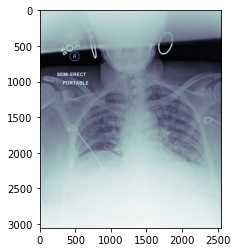

In [8]:
image_path = '/share/fsmresfiles/MIMIC_CXR/2.0.0/s58219844/88498b37-c21dc7ba-bc202800-b517a62d-f7ac5bcf.dcm'
ds = pydicom.dcmread(image_path)

plt.imshow(ds.pixel_array,cmap=plt.cm.bone)

In [10]:
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 2.25.181156868769981012043172036552678680109
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 2.25.55362949469033348352269585565668676650
(0002, 0013) Implementation Version Name         SH: 'MIMIC-CXR v2.0.0'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY']
(0008, 0016) SOP Class UID                       UI: Digital X-Ray Image Storage - For Presentation
(0008, 0018) SOP Instance UID                    UI: 2.25.18115686876998101204317203655267

In [49]:
ds.ProcedureCodeSequence[0]

(0008, 0100) Code Value                          SH: 'C12'
(0008, 0102) Coding Scheme Designator            SH: 'CLP'
(0008, 0104) Code Meaning                        LO: 'CHEST (PORTABLE AP)'

In [80]:
study = pd.read_csv(os.path.join(data_path,'cxr-study-list.csv'))

In [111]:
from tqdm import tqdm
for i in tqdm(range(len(study))):
    with open(os.path.join(data_path,study['path'].iloc[i])) as f:
        study['text'].iloc[i] = f.read().strip().lower()


  0%|                                                                                                                                                                        | 0/227835 [00:00<?, ?it/s]/tmp/ipykernel_3928/3196062173.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  study['text'].iloc[i] = f.read().strip().lower()
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 227835/227835 [1:34:46<00:00, 40.06it/s]


In [125]:
study

,subject_id,study_id,path,text
0,10000032,50414267,files/p10/p10000032/s50414267.txt,final report\n examination: chest (pa and lat...
1,10000032,53189527,files/p10/p10000032/s53189527.txt,final report\n examination: chest (pa and lat...
2,10000032,53911762,files/p10/p10000032/s53911762.txt,final report\n examination: chest (portable a...
3,10000032,56699142,files/p10/p10000032/s56699142.txt,final report\n indication: ___ year old woman...
4,10000764,57375967,files/p10/p10000764/s57375967.txt,final report\n examination: chest (pa and lat...
...,...,...,...,...
227830,19999442,58708861,files/p19/p19999442/s58708861.txt,final report\n portable ap chest x-ray\n \n in...
227831,19999733,57132437,files/p19/p19999733/s57132437.txt,final report\n indication: ___-year-old with ...
227832,19999987,55368167,files/p19/p19999987/s55368167.txt,final report\n portable chest of ___\n \n comp...
227833,19999987,58621812,files/p19/p19999987/s58621812.txt,final report\n chest radiograph performed on _...


In [126]:
study.to_csv('/data/Mao/DATASET/MIMIC-CXR/2.0.0/cxr-study-list.csv',index=False)